In [ ]:
'''
3.In Big Brother society, the thought police wants to follow a “divide and conquer” strategy
by fragmenting the social network into isolated components. You belong to the resistance
and want to foil their plans. There rumours that the police wants to detain individuals that
have many friends and individuals whose friends tend to know each other. The resistance
puts you in charge to decide which individuals to protect: those whose friendship circle is
highly interconnected or those with many friends. To decide you simulate two different
attacks on your network, by removing (i) the nodes that have the highest clustering
coefficient and (ii) the nodes that have the largest degree.
Write R script or Python script to study the giant component in function of removed nodes
for the two attacks on the following network:
    
i) A network with 1000 generated with the configuration model and power law degree
distribution with γ = 2.5
Which is the most sensitive topological information, clustering coefficient or degree, which
if protected, limits the damage best? Would it be better if all individuals’ information could
be kept secret? Explain
'''

In [1]:
from operator import itemgetter
import networkx as nx
from networkx.algorithms import community
import matplotlib.pyplot as plt
import copy

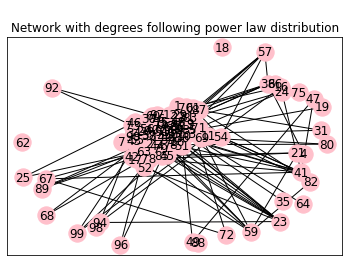

In [28]:
#A network with 1000 with power law degree distribution with γ = 2.5

n = 100                 #nodes
power_law_exponent = 2.5

s1 = nx.utils.powerlaw_sequence(n , power_law_exponent)      
G = nx.expected_degree_graph(s1, selfloops=False)
#pos = nx.spring_layout(G)
nx.draw_networkx(G, pos,node_color ='pink')       #plotting the graph
plt.title("\nNetwork with degrees following power law distribution")
plt.show()


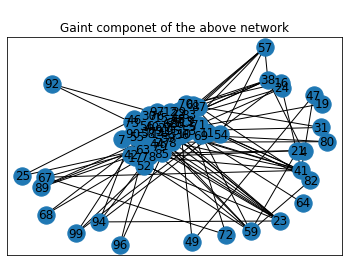

The size of the network is 100
Size of the gaint component 77


In [29]:
#Finding the graphs gaint component
Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
G0 = G.subgraph(Gcc[0])
#Visualise the Gaint component of the network..
nx.draw_networkx(G0, pos)
plt.title("\nGaint componet of the above network")
plt.show()

y = len(G0)         
print("The size of the network is", n)
print("Size of the gaint component",y)

In [30]:
#Number of different connected components 
print("\nNumber of different connected components",nx.number_connected_components(G)) 
  
#list of nodes in different connected components 
print("\n",list(nx.connected_components(G)))
  


Number of different connected components 23

 [{0}, {1}, {2}, {3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 19, 21, 22, 23, 24, 25, 27, 28, 29, 30, 31, 33, 36, 37, 38, 39, 40, 41, 42, 44, 46, 47, 48, 49, 52, 53, 54, 55, 56, 57, 58, 59, 61, 63, 64, 65, 67, 68, 69, 70, 71, 72, 73, 76, 77, 78, 79, 80, 82, 83, 85, 86, 87, 89, 90, 91, 92, 94, 95, 96, 97, 99}, {18}, {20}, {26}, {32}, {34}, {35, 84}, {43}, {45}, {50}, {51}, {60}, {62}, {66}, {74}, {75}, {81}, {88}, {93}, {98}]


In [31]:
def find_gaint_component(G):
    Gcc = sorted(nx.connected_components(G), key=len, reverse=True)
    G0 = G.subgraph(Gcc[0])

    nx.draw_networkx(G0, pos)
    plt.title("\nGaint componet of the above network")
    plt.show()

    y = len(G0)         
    print("The size of the network is", n)
    print("Size of the gaint component",y)

In [32]:
sorted_clustering_coeff = sorted(nx.clustering(G).items(), key=itemgetter(1), reverse=True)
print("Top 10 nodes by Clustering coeffiecient")
for d in sorted_clustering_coeff[:10]:
    print(d)

Top 10 nodes by Clustering coeffiecient
(67, 0.3333333333333333)
(61, 0.16666666666666666)
(79, 0.1)
(86, 0.1)
(38, 0.06666666666666667)
(57, 0.06666666666666667)
(65, 0.06666666666666667)
(8, 0.02857142857142857)
(23, 0.027777777777777776)
(41, 0.027777777777777776)


In [44]:
 #Attack-1 remove nodes that have the highest clustering coefficient.
G1=copy.deepcopy(G)
for i in range(0,20):
    G1.remove_node(sorted_clustering_coeff[i][0])

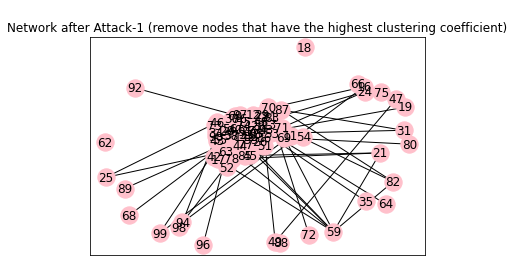

In [45]:
nx.draw_networkx(G1,pos,node_color="pink")       #plotting the graph
plt.title("\nNetwork after Attack-1 (remove nodes that have the highest clustering coefficient)")
plt.show()

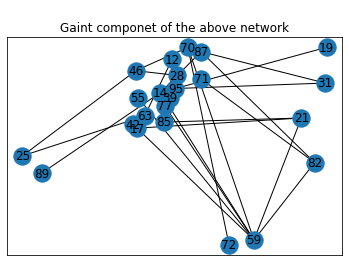

The size of the network is 100
Size of the gaint component 23


In [46]:
find_gaint_component(G1)

In [37]:
degree_dict = dict(G.degree(G.nodes()))
nx.set_node_attributes(G, degree_dict, 'degree')
sorted_degree = sorted(degree_dict.items(), key=itemgetter(1), reverse=True)
print("Top 10 nodes by degree:")
for d in sorted_degree[:10]:
    print(d)

Top 10 nodes by degree:
(8, 15)
(23, 9)
(41, 9)
(59, 7)
(38, 6)
(57, 6)
(65, 6)
(79, 5)
(86, 5)
(10, 4)


In [41]:
 #Attack-2 remove nodes that have the largest degree.
G2=copy.deepcopy(G)
for i in range(0,20):
    G2.remove_node(sorted_degree[i][0])

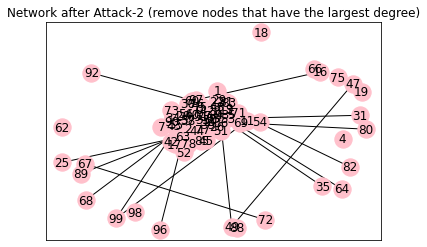

In [42]:
nx.draw_networkx(G2,pos,node_color="pink")       #plotting the graph
plt.title("Network after Attack-2 (remove nodes that have the largest degree)")
plt.show()

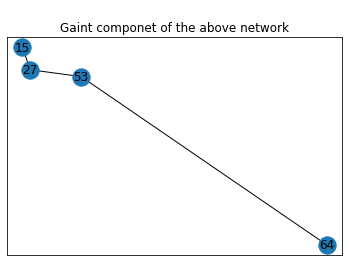

The size of the network is 100
Size of the gaint component 4


In [43]:
find_gaint_component(G2)

In [ ]:
#Therefore from the above experiment, we found that degree is the most sensitive topological information..Because if top 20 nodes with highest degree node is removed the networks gaint component is highly affected than when top 20 nodes with highest clustering coeff is removed.

In [ ]:
#therefore individuals with highest degree of friendship if protected limits the damage..